In [1]:
import opennsfw2 as n2
import os,sys,time
# To get the NSFW probability of a single image.
image_path = r"../img/2.png"

nsfw_probability = n2.predict_image(image_path)
print(f'img:{image_path}\nnsfw predict:{nsfw_probability*100:.2f}%')

# To get the NSFW probabilities of a list of images.
# This is better than looping with `predict_image` as the model will only be instantiated once
# and batching is used during inference.
image_paths = [
  r"../img/00037.png",
  r"../img/00198-3869624274.png",
  r"../img/0110.png",
  r"../img/7E184712666.jpg",
  r"../img/6F184712202.jpg",
  r"../img/1B92928877.jpg",
  r"../img/50164932965.jpg",
  r"../img/CB153719649.jpg",
  r"../img/51.jpg",
  r"../img/SDXL_2x_00540_.png",
  r"../img/00072-1960626877.png"
  # ...
]

nsfw_probabilities = n2.predict_images(image_paths)
for image_path, nsfw_probability in zip(image_paths, nsfw_probabilities):
    print(f'img:{image_path}\nnsfw predict:{nsfw_probability*100:.2f}%')

Using TensorFlow backend
img:../img/018.png
nsfw predict:13.30%
img:../img/00037.png
nsfw predict:99.77%
img:../img/00198-3869624274.png
nsfw predict:56.68%
img:../img/0110.png
nsfw predict:99.92%
img:../img/7E184712666.jpg
nsfw predict:96.60%
img:../img/6F184712202.jpg
nsfw predict:73.05%
img:../img/1B92928877.jpg
nsfw predict:73.94%
img:../img/50164932965.jpg
nsfw predict:68.98%
img:../img/CB153719649.jpg
nsfw predict:93.34%
img:../img/51.jpg
nsfw predict:51.50%
img:../img/SDXL_2x_00540_.png
nsfw predict:17.12%
img:../img/00072-1960626877.png
nsfw predict:0.21%


In [23]:
image_path = r"../img/2.jpg"

nsfw_probability = n2.predict_image(image_path)
print(f'img:{image_path}\nnsfw predict:{nsfw_probability*100:.2f}%')

img:../img/2.jpg
nsfw predict:53.35%


In [28]:
import opennsfw2 as n2
import os,sys,time
img_folder=os.path.abspath(r"../Erikaki")
img_P1=os.path.abspath(r"../Erikaki/1.jpg")
imgs=os.listdir(img_folder)
imgs_path=[os.path.abspath(os.path.join(img_folder,img)) for img in imgs]
os.path.isfile(imgs_path[0])
imgs_path[0]
nsfw_probability = n2.predict_image(imgs_path[2])
print(f'img:{image_path}\nnsfw predict:{nsfw_probability*100:.2f}%')

img:../img/2.jpg
nsfw predict:7.66%


In [29]:
nsfw_probabilities = n2.predict_images(imgs_path)
for image_path, nsfw_probability in zip(image_paths, nsfw_probabilities):
    print(f'img:{image_path}\nnsfw predict:{nsfw_probability*100:.2f}%')

img:../img/00037.png
nsfw predict:0.47%
img:../img/00198-3869624274.png
nsfw predict:0.95%
img:../img/0110.png
nsfw predict:7.66%
img:../img/7E184712666.jpg
nsfw predict:32.30%
img:../img/6F184712202.jpg
nsfw predict:49.18%
img:../img/1B92928877.jpg
nsfw predict:27.65%
img:../img/50164932965.jpg
nsfw predict:0.08%
img:../img/CB153719649.jpg
nsfw predict:18.38%
img:../img/51.jpg
nsfw predict:8.48%
img:../img/SDXL_2x_00540_.png
nsfw predict:24.66%
img:../img/00072-1960626877.png
nsfw predict:22.01%


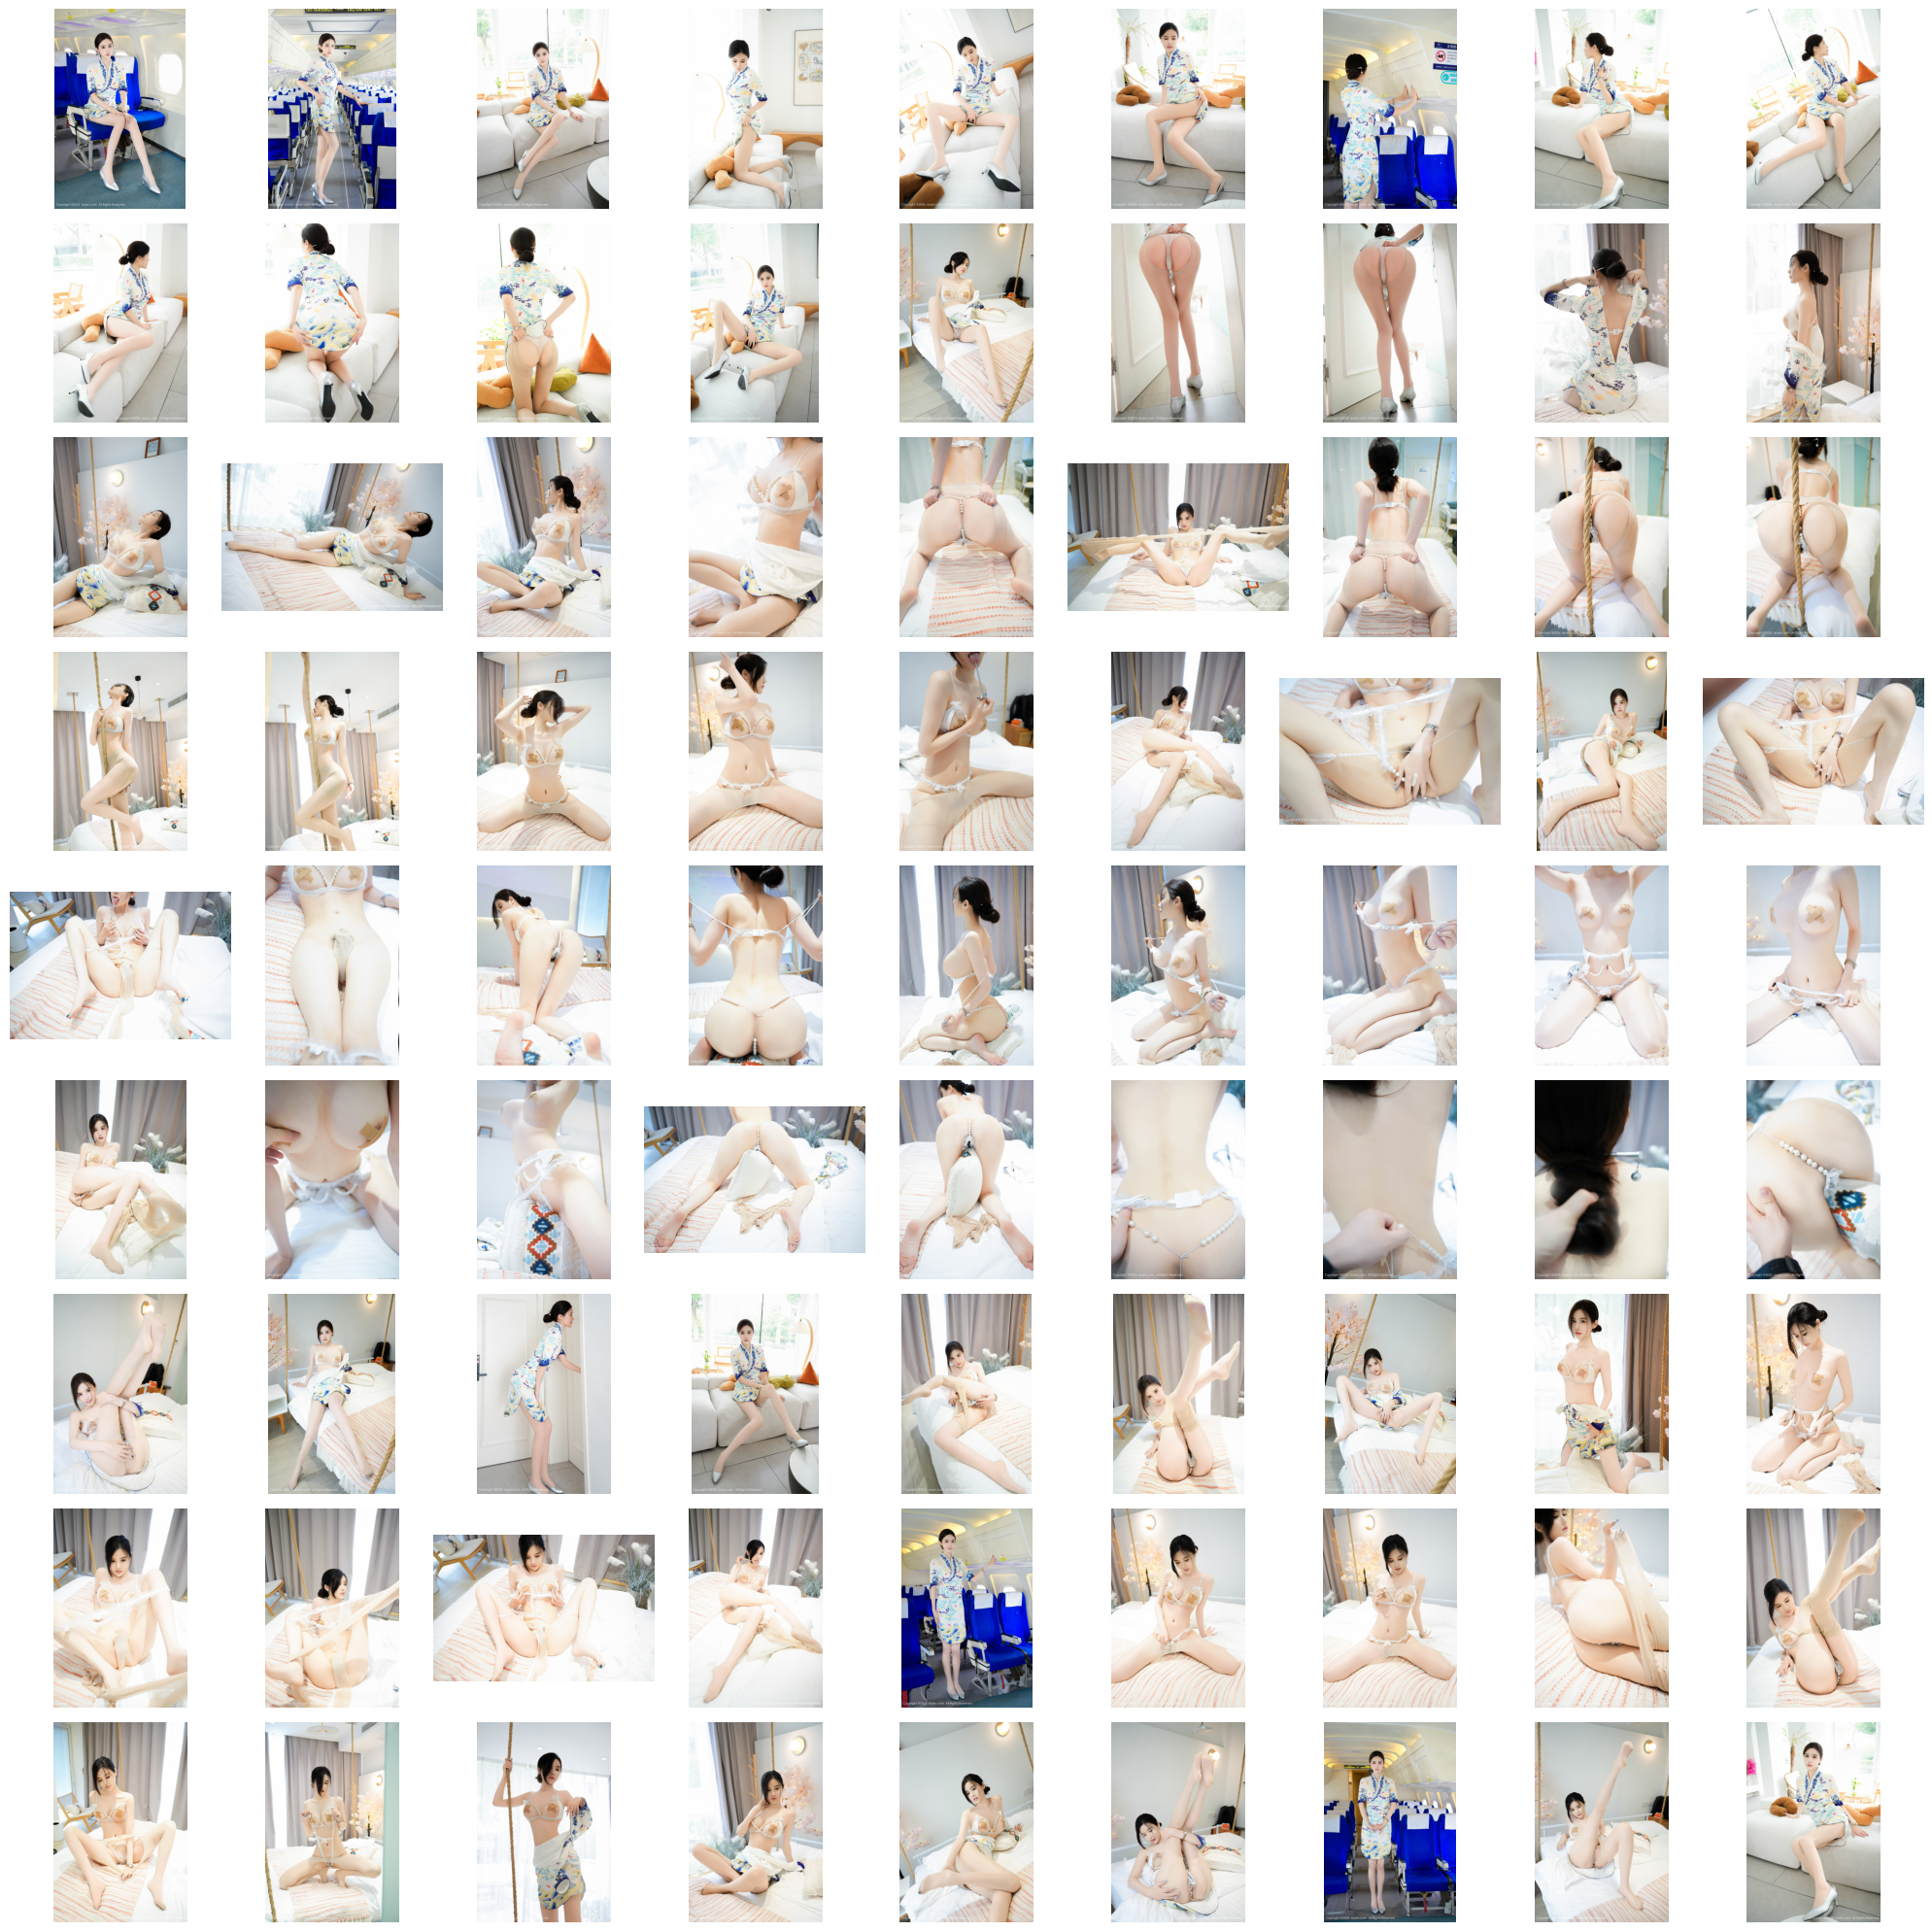

In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 文件夹路径
folder_path = os.path.abspath(r"../Erikaki")


# 获取文件夹中的所有图片文件
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# 按文件名排序
image_files.sort()

# 每行显示9张图片
num_images = len(image_files)
num_rows = (num_images + 8) // 9  # 向上取整

# 创建一个图形对象
fig, axes = plt.subplots(num_rows, 9, figsize=(20, 20))

# 遍历所有图片
for i, image_file in enumerate(image_files):
    # 计算行和列索引
    row = i // 9
    col = i % 9
    
    # 显示图片
    img = mpimg.imread(os.path.join(folder_path, image_file))
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # 关闭坐标轴
    axes[row, col].set_title(image_file)

# 调整子图布局
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'nsfw_result.pdf'))
# 显示图形
plt.show()


In [58]:
def show_nsfw_images(img_folder_path,pic_n:int=6):
    # 获取文件夹中的所有图片文件
    image_files = [f for f in os.listdir(img_folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif','.webp'))]
    # 按文件名排序
    image_files.sort()
    # nsfw detection
    imgs_paths=[os.path.abspath(os.path.join(img_folder_path,img)) for img in image_files]
    nsfw_probabilities = n2.predict_images(imgs_paths)
    nsfw_list=[(image_files[i],nsfw_probabilities[i]) for i in range(len(image_files))]
        
    # 每行显示9张图片
    num_images = len(image_files)
    num_rows = (num_images + pic_n-1) // pic_n  # 向上取整
    # 创建一个图形对象
    fig, axes = plt.subplots(num_rows, pic_n, figsize=(25, 25))

    # 遍历所有图片
    for i, image_file in enumerate(image_files):
        # 计算行和列索引
        row = i // pic_n
        col = i % pic_n
        nsfw_probability = nsfw_probabilities[i]
        # 显示图片
        img = mpimg.imread(os.path.join(folder_path, image_file))
        axes[row, col].imshow(img)
        axes[row, col].axis('off')  # 关闭坐标轴
        axes[row, col].set_title(f'{image_file}:{nsfw_probability*100:.2f}%')

    # 调整子图布局
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'nsfw_result.pdf'))
    # 显示图形
    #plt.show()
    
    # 返回图片文件名和nsfw概率的列表
        
    return nsfw_list

In [59]:
folder_path = os.path.abspath(r"F:\Beautyleg\1")
nsfw_result=show_nsfw_images(folder_path)

In [57]:
nsfw_result


[('0.webp', 0.30676552653312683),
 ('1.webp', 0.1680050492286682),
 ('10.webp', 0.4754827618598938),
 ('11.webp', 0.2519313395023346),
 ('12.webp', 0.9724709391593933),
 ('13.webp', 0.6282431483268738),
 ('14.webp', 0.6754536628723145),
 ('15.webp', 0.28762975335121155),
 ('16.webp', 0.2981073260307312),
 ('17.webp', 0.17121317982673645),
 ('18.webp', 0.471530944108963),
 ('19.webp', 0.9434432983398438),
 ('2.webp', 0.24232007563114166),
 ('20.webp', 0.6219945549964905),
 ('21.webp', 0.7980365753173828),
 ('22.webp', 0.8432087302207947),
 ('23.webp', 0.3238294720649719),
 ('24.webp', 0.0133640356361866),
 ('25.webp', 0.707790195941925),
 ('26.webp', 0.08067083358764648),
 ('27.webp', 0.047155093401670456),
 ('28.webp', 0.3106333613395691),
 ('29.webp', 0.23704174160957336),
 ('3.webp', 0.5584981441497803),
 ('30.webp', 0.13703139126300812),
 ('31.webp', 0.10994643718004227),
 ('32.webp', 0.5284711718559265),
 ('33.webp', 0.46126455068588257),
 ('34.webp', 0.3452698290348053),
 ('35.web